# Model RESNET18

In [1]:
import torch.nn as nn

class ResNet18(nn.Module):
    def __init__(self, num_classes):
        super(ResNet18, self).__init__()

        self.dropout_percentage = 0.5
        self.relu = nn.ReLU()

        # BLOCK-1 (starting block) input=(224x224) output=(112x112)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
        self.batchnorm1 = nn.BatchNorm2d(64)
        self.maxpool1 = nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

        # BLOCK-2 (1) input=(112x112) output = (56x56)
        self.conv2_1_1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_1_1 = nn.BatchNorm2d(64)
        self.conv2_1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_1_2 = nn.BatchNorm2d(64)
        self.dropout2_1 = nn.Dropout(p=self.dropout_percentage)

        # BLOCK-2 (2)
        self.conv2_2_1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_2_1 = nn.BatchNorm2d(64)
        self.conv2_2_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_2_2 = nn.BatchNorm2d(64)
        self.dropout2_2 = nn.Dropout(p=self.dropout_percentage)

        # BLOCK-3 (1) input=(56x56) output = (28x28)
        self.conv3_1_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.batchnorm3_1_1 = nn.BatchNorm2d(128)
        self.conv3_1_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm3_1_2 = nn.BatchNorm2d(128)
        self.concat_adjust_3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(1, 1), stride=(2, 2),
                                         padding=(0, 0))
        self.dropout3_1 = nn.Dropout(p=self.dropout_percentage)
        # BLOCK-3 (2)
        self.conv3_2_1 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm3_2_1 = nn.BatchNorm2d(128)
        self.conv3_2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm3_2_2 = nn.BatchNorm2d(128)
        self.dropout3_2 = nn.Dropout(p=self.dropout_percentage)

        # BLOCK-4 (1) input=(28x28) output = (14x14)
        self.conv4_1_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.batchnorm4_1_1 = nn.BatchNorm2d(256)
        self.conv4_1_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm4_1_2 = nn.BatchNorm2d(256)
        self.concat_adjust_4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(1, 1), stride=(2, 2),
                                         padding=(0, 0))
        self.dropout4_1 = nn.Dropout(p=self.dropout_percentage)
        # BLOCK-4 (2)
        self.conv4_2_1 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm4_2_1 = nn.BatchNorm2d(256)
        self.conv4_2_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm4_2_2 = nn.BatchNorm2d(256)
        self.dropout4_2 = nn.Dropout(p=self.dropout_percentage)

        # BLOCK-5 (1) input=(14x14) output = (7x7)
        self.conv5_1_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.batchnorm5_1_1 = nn.BatchNorm2d(512)
        self.conv5_1_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm5_1_2 = nn.BatchNorm2d(512)
        self.concat_adjust_5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(1, 1), stride=(2, 2),
                                         padding=(0, 0))
        self.dropout5_1 = nn.Dropout(p=self.dropout_percentage)
        # BLOCK-5 (2)
        self.conv5_2_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm5_2_1 = nn.BatchNorm2d(512)
        self.conv5_2_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm5_2_2 = nn.BatchNorm2d(512)
        self.dropout5_2 = nn.Dropout(p=self.dropout_percentage)

        # Final Block input=(7x7)
        self.avgpool = nn.AvgPool2d(kernel_size=(7, 7), stride=(1, 1))
        self.fc = nn.Linear(in_features=1 * 1 * 512, out_features=1000)
        self.out = nn.Linear(in_features=1000, out_features=num_classes)
        # END

    def forward(self, x):
        # block 1 --> Starting block
        x = self.relu(self.batchnorm1(self.conv1(x)))
        op1 = self.maxpool1(x)

        # block2 - 1
        x = self.relu(self.batchnorm2_1_1(self.conv2_1_1(op1)))  # conv2_1
        x = self.batchnorm2_1_2(self.conv2_1_2(x))  # conv2_1
        x = self.dropout2_1(x)
        # block2 - Adjust - No adjust in this layer as dimensions are already same
        # block2 - Concatenate 1
        op2_1 = self.relu(x + op1)
        # block2 - 2
        x = self.relu(self.batchnorm2_2_1(self.conv2_2_1(op2_1)))  # conv2_2
        x = self.batchnorm2_2_2(self.conv2_2_2(x))  # conv2_2
        x = self.dropout2_2(x)
        # op - block2
        op2 = self.relu(x + op2_1)

        # block3 - 1[Convolution block]
        x = self.relu(self.batchnorm3_1_1(self.conv3_1_1(op2)))  # conv3_1
        x = self.batchnorm3_1_2(self.conv3_1_2(x))  # conv3_1
        x = self.dropout3_1(x)
        # block3 - Adjust
        op2 = self.concat_adjust_3(op2)  # SKIP CONNECTION
        # block3 - Concatenate 1
        op3_1 = self.relu(x + op2)
        # block3 - 2[Identity Block]
        x = self.relu(self.batchnorm3_2_1(self.conv3_2_1(op3_1)))  # conv3_2
        x = self.batchnorm3_2_2(self.conv3_2_2(x))  # conv3_2
        x = self.dropout3_2(x)
        # op - block3
        op3 = self.relu(x + op3_1)

        # block4 - 1[Convolition block]
        x = self.relu(self.batchnorm4_1_1(self.conv4_1_1(op3)))  # conv4_1
        x = self.batchnorm4_1_2(self.conv4_1_2(x))  # conv4_1
        x = self.dropout4_1(x)
        # block4 - Adjust
        op3 = self.concat_adjust_4(op3)  # SKIP CONNECTION
        # block4 - Concatenate 1
        op4_1 = self.relu(x + op3)
        # block4 - 2[Identity Block]
        x = self.relu(self.batchnorm4_2_1(self.conv4_2_1(op4_1)))  # conv4_2
        x = self.batchnorm4_2_2(self.conv4_2_2(x))  # conv4_2
        x = self.dropout4_2(x)
        # op - block4
        op4 = self.relu(x + op4_1)

        # block5 - 1[Convolution Block]
        x = self.relu(self.batchnorm5_1_1(self.conv5_1_1(op4)))  # conv5_1
        x = self.batchnorm5_1_2(self.conv5_1_2(x))  # conv5_1
        x = self.dropout5_1(x)
        # block5 - Adjust
        op4 = self.concat_adjust_5(op4)  # SKIP CONNECTION
        # block5 - Concatenate 1
        op5_1 = self.relu(x + op4)
        # block5 - 2[Identity Block]
        x = self.relu(self.batchnorm5_2_1(self.conv5_2_1(op5_1)))  # conv5_2
        x = self.batchnorm5_2_1(self.conv5_2_1(x))  # conv5_2
        x = self.dropout5_2(x)
        # op - block5
        op5 = self.relu(x + op5_1)

        # FINAL BLOCK - classifier
        x = self.avgpool(op5)
        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.fc(x))
        x = self.out(x)

        return x

# Resnet18 trainning

Training:  30%|█████████▍                     | 281/925 [01:48<03:17,  3.27it/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Valid: 100%|██████████████████████████████████| 132/132 [00:35<00:00,  3.74it/s]


Epoch 0: Train loss = 1.6246265768360448, Train accuracy: 0.3734637799617406
Epoch 0: Validation loss = 1.9557588010123281, Validation accuracy: 0.3359552889385007
Validation accuracy increased (0 --> 0.3359552889385007). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.35it/s]


Epoch 1: Train loss = 1.3079923628471992, Train accuracy: 0.5027764162501773
Epoch 1: Validation loss = 1.2636028419841419, Validation accuracy: 0.5158064101230014
Validation accuracy increased (0.3359552889385007 --> 0.5158064101230014). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.07it/s]


Epoch 2: Train loss = 1.1113703599491636, Train accuracy: 0.5757299445448695
Epoch 2: Validation loss = 1.039954196323048, Validation accuracy: 0.6117193147991643
Validation accuracy increased (0.5158064101230014 --> 0.6117193147991643). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.69it/s]


Epoch 3: Train loss = 0.9667535110099895, Train accuracy: 0.6294504069959795
Epoch 3: Validation loss = 1.027327319212032, Validation accuracy: 0.6154355670918118
Validation accuracy increased (0.6117193147991643 --> 0.6154355670918118). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.78it/s]


Epoch 4: Train loss = 0.8477431750941921, Train accuracy: 0.6740021091538506
Epoch 4: Validation loss = 0.8879996933268778, Validation accuracy: 0.6699517773407878
Validation accuracy increased (0.6154355670918118 --> 0.6699517773407878). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.04it/s]


Epoch 5: Train loss = 0.7650515745781563, Train accuracy: 0.7036637944788546
Epoch 5: Validation loss = 0.9405965811826966, Validation accuracy: 0.6296281570738013


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.90it/s]


Epoch 6: Train loss = 0.680741222500801, Train accuracy: 0.7349028669821249
Epoch 6: Validation loss = 0.7981575199148871, Validation accuracy: 0.6966020419742122
Validation accuracy increased (0.6699517773407878 --> 0.6966020419742122). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.91it/s]


Epoch 7: Train loss = 0.6190345540723285, Train accuracy: 0.7572384268206519
Epoch 7: Validation loss = 0.7210804682337877, Validation accuracy: 0.7253063018574859
Validation accuracy increased (0.6966020419742122 --> 0.7253063018574859). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.07it/s]


Epoch 8: Train loss = 0.5609212950919126, Train accuracy: 0.7772303270971452
Epoch 8: Validation loss = 0.8084647206194473, Validation accuracy: 0.6953319053758275


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.86it/s]


Epoch 9: Train loss = 0.5109697788792688, Train accuracy: 0.7957239959691021
Epoch 9: Validation loss = 0.7806655793930545, Validation accuracy: 0.7003201289158879


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.77it/s]


Epoch 10: Train loss = 0.4597635008193351, Train accuracy: 0.8179875182138907
Epoch 10: Validation loss = 0.6800013173258665, Validation accuracy: 0.731035700801647
Validation accuracy increased (0.7253063018574859 --> 0.731035700801647). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.94it/s]


Epoch 11: Train loss = 0.4221809086203575, Train accuracy: 0.8295201193964159
Epoch 11: Validation loss = 0.901110608243581, Validation accuracy: 0.6741524442578807


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.98it/s]


Epoch 12: Train loss = 0.3881287176866789, Train accuracy: 0.8448131000995636
Epoch 12: Validation loss = 0.916844724705725, Validation accuracy: 0.6724460739077944


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.01it/s]


Epoch 13: Train loss = 0.34975826970628787, Train accuracy: 0.8537752298406652
Epoch 13: Validation loss = 1.1829037300565026, Validation accuracy: 0.5885987554987272


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.82it/s]


Epoch 14: Train loss = 0.3201974316223248, Train accuracy: 0.8695081592250514
Epoch 14: Validation loss = 1.3288432427427985, Validation accuracy: 0.5738236457109451


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.82it/s]


Epoch 15: Train loss = 0.30007085478386364, Train accuracy: 0.876032794488443
Epoch 15: Validation loss = 1.3849680920441945, Validation accuracy: 0.5580332525300257


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.74it/s]


Epoch 16: Train loss = 0.27393535713891726, Train accuracy: 0.8857589799004633
Epoch 16: Validation loss = 1.1720558445562015, Validation accuracy: 0.6312559222181638


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.82it/s]


Epoch 17: Train loss = 0.24577666798757541, Train accuracy: 0.89720840544314
Epoch 17: Validation loss = 1.24651777473363, Validation accuracy: 0.5865862588539268


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.07it/s]


Epoch 18: Train loss = 0.2303383990075137, Train accuracy: 0.9045886410249246
Epoch 18: Validation loss = 1.3871999974503662, Validation accuracy: 0.516963992832285


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.92it/s]


Epoch 19: Train loss = 0.21252322441822774, Train accuracy: 0.9096970690907659
Epoch 19: Validation loss = 1.4624250359607465, Validation accuracy: 0.5304140290527632


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.96it/s]


Epoch 20: Train loss = 0.20184214492303293, Train accuracy: 0.9130206685452847
Epoch 20: Validation loss = 2.457035367235993, Validation accuracy: 0.3431315671539668


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.05it/s]


Epoch 21: Train loss = 0.18510639050018948, Train accuracy: 0.9186130573942854
Epoch 21: Validation loss = 1.493855635325114, Validation accuracy: 0.5019324934392264


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.99it/s]


Epoch 22: Train loss = 0.16868890895130667, Train accuracy: 0.9272154641795802
Epoch 22: Validation loss = 1.4580976181861125, Validation accuracy: 0.5325613710464854


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.75it/s]


Epoch 23: Train loss = 0.1625053051416133, Train accuracy: 0.9283463467778387
Epoch 23: Validation loss = 1.7902402480443318, Validation accuracy: 0.46062370254234836


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.83it/s]


Epoch 24: Train loss = 0.15098384041892918, Train accuracy: 0.9345654614551647
Epoch 24: Validation loss = 1.7546255904616732, Validation accuracy: 0.4800007478757338


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.72it/s]


Epoch 25: Train loss = 0.1448300304570915, Train accuracy: 0.9406972745302561
Epoch 25: Validation loss = 1.7591440316402551, Validation accuracy: 0.46633174033327535


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.93it/s]


Epoch 26: Train loss = 0.13328106188794245, Train accuracy: 0.9429405636400789
Epoch 26: Validation loss = 1.7766202471473, Validation accuracy: 0.4875658635388721


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.71it/s]


Epoch 27: Train loss = 0.12740623510354576, Train accuracy: 0.9457577767243256
Epoch 27: Validation loss = 2.0858908810398797, Validation accuracy: 0.41132427898771834


Valid: 100%|██████████████████████████████████| 132/132 [00:29<00:00,  4.53it/s]


Epoch 28: Train loss = 0.11972201834936198, Train accuracy: 0.9495380226341453
Epoch 28: Validation loss = 2.037526835094799, Validation accuracy: 0.42089453023491485


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.92it/s]


Epoch 29: Train loss = 0.12120247833581792, Train accuracy: 0.9472779810750807
Epoch 29: Validation loss = 1.9389330157727906, Validation accuracy: 0.38504125606833084


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.61it/s]


Epoch 30: Train loss = 0.1086280992433328, Train accuracy: 0.9524555297155638
Epoch 30: Validation loss = 1.592134235031677, Validation accuracy: 0.5206286197133136


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.62it/s]


Epoch 31: Train loss = 0.10752307612952348, Train accuracy: 0.9507332890098159
Epoch 31: Validation loss = 1.9414514944408878, Validation accuracy: 0.38052783330733125


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.60it/s]


Epoch 32: Train loss = 0.10419722581357771, Train accuracy: 0.954602733045011
Epoch 32: Validation loss = 1.9753738686893925, Validation accuracy: 0.3963220183822242


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.79it/s]


Epoch 33: Train loss = 0.09914379613373328, Train accuracy: 0.9575029485290115
Epoch 33: Validation loss = 2.568989925312273, Validation accuracy: 0.3200095131654631


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.70it/s]


Epoch 34: Train loss = 0.0910797403589193, Train accuracy: 0.9609499844344886
Epoch 34: Validation loss = 1.7316448173739694, Validation accuracy: 0.47819555325038504


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.82it/s]


Epoch 35: Train loss = 0.09049045489068974, Train accuracy: 0.962022156715393
Epoch 35: Validation loss = 1.8766651126471432, Validation accuracy: 0.41161608616962575


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.75it/s]


Epoch 36: Train loss = 0.09520050896356838, Train accuracy: 0.9602849634273632
Epoch 36: Validation loss = 2.091696043809255, Validation accuracy: 0.4131945969932007


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.74it/s]


Epoch 37: Train loss = 0.07982478632415468, Train accuracy: 0.9664665042387472
Epoch 37: Validation loss = 2.339309794433189, Validation accuracy: 0.3478677095563123


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.61it/s]


Epoch 38: Train loss = 0.08629038142745156, Train accuracy: 0.9608313034676217
Epoch 38: Validation loss = 2.014051489757769, Validation accuracy: 0.38262618096037343


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.73it/s]


Epoch 39: Train loss = 0.07955649037795091, Train accuracy: 0.9671196563823803
Epoch 39: Validation loss = 1.7419367414532285, Validation accuracy: 0.46304456968650676


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.74it/s]


Epoch 40: Train loss = 0.07845269305920984, Train accuracy: 0.966264024940697
Epoch 40: Validation loss = 2.2650612782348287, Validation accuracy: 0.3506047729064118


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.03it/s]


Epoch 41: Train loss = 0.07880877754197935, Train accuracy: 0.9667972006024541
Epoch 41: Validation loss = 1.8880161037950804, Validation accuracy: 0.44844399178118416


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.90it/s]


Epoch 42: Train loss = 0.06893767926124604, Train accuracy: 0.970134037378672
Epoch 42: Validation loss = 1.9087169974139242, Validation accuracy: 0.4173118481130311


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.95it/s]


Epoch 43: Train loss = 0.07091787310052865, Train accuracy: 0.9725818146886053
Epoch 43: Validation loss = 2.0488648306239736, Validation accuracy: 0.431190027770671


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.80it/s]


Epoch 44: Train loss = 0.06661024164156737, Train accuracy: 0.9715634222932764
Epoch 44: Validation loss = 1.8837916525927456, Validation accuracy: 0.4011905886458628


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.90it/s]


Epoch 45: Train loss = 0.06804019026231725, Train accuracy: 0.9709879074225555
Epoch 45: Validation loss = 1.9271193706628047, Validation accuracy: 0.3881563808430325


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.97it/s]


Epoch 46: Train loss = 0.063860395061343, Train accuracy: 0.9729277003777994
Epoch 46: Validation loss = 1.8032589906995946, Validation accuracy: 0.39353321628137067


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.10it/s]


Epoch 47: Train loss = 0.06474114240870836, Train accuracy: 0.9729584465800105
Epoch 47: Validation loss = 1.866103101860393, Validation accuracy: 0.43315472843294794


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.11it/s]


Epoch 48: Train loss = 0.06384537284407212, Train accuracy: 0.9729618984299737
Epoch 48: Validation loss = 1.8097943609411067, Validation accuracy: 0.435265158839298


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.08it/s]


Epoch 49: Train loss = 0.055343871973045924, Train accuracy: 0.9776222409428776
Epoch 49: Validation loss = 1.8870595847115372, Validation accuracy: 0.4586522212308465


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.14it/s]


Epoch 50: Train loss = 0.055507312303635516, Train accuracy: 0.9764038294070476
Epoch 50: Validation loss = 2.451453717369022, Validation accuracy: 0.31373840164054523


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.92it/s]


Epoch 51: Train loss = 0.05872535546093147, Train accuracy: 0.9745181272480938
Epoch 51: Validation loss = 2.8296613169438913, Validation accuracy: 0.23409023087923275


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.07it/s]


Epoch 52: Train loss = 0.05699227010032061, Train accuracy: 0.9773192596435547
Epoch 52: Validation loss = 2.7465272934147804, Validation accuracy: 0.2375190066681667


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.22it/s]


Epoch 53: Train loss = 0.057894689848684275, Train accuracy: 0.9745372091757285
Epoch 53: Validation loss = 3.3644054116624775, Validation accuracy: 0.19896257468358133


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.19it/s]


Epoch 54: Train loss = 0.05473196667249352, Train accuracy: 0.9757240886301608
Epoch 54: Validation loss = 2.786693915273204, Validation accuracy: 0.2999234495289398


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.19it/s]


Epoch 55: Train loss = 0.04811606525972083, Train accuracy: 0.9787918222917092
Epoch 55: Validation loss = 2.502712593837218, Validation accuracy: 0.3277426324220318


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.36it/s]


Epoch 56: Train loss = 0.05263938435913391, Train accuracy: 0.9778419640901926
Epoch 56: Validation loss = 2.766629671508616, Validation accuracy: 0.25007098952703405


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.23it/s]


Epoch 57: Train loss = 0.05414018073100345, Train accuracy: 0.9784359049152683
Epoch 57: Validation loss = 1.7889278675570632, Validation accuracy: 0.4027389677410776


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.27it/s]


Epoch 58: Train loss = 0.04935950358439161, Train accuracy: 0.9773467600023424
Epoch 58: Validation loss = 1.8592383509332484, Validation accuracy: 0.450625645617644


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.32it/s]


Epoch 59: Train loss = 0.045792397612523336, Train accuracy: 0.9816158707077439
Epoch 59: Validation loss = 2.032384371215647, Validation accuracy: 0.3604773103513501


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.16it/s]


Epoch 60: Train loss = 0.048643410724990475, Train accuracy: 0.9792623796978512
Epoch 60: Validation loss = 1.8447292916702502, Validation accuracy: 0.4500053789127957


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.29it/s]


Epoch 61: Train loss = 0.04786768466652673, Train accuracy: 0.97893520851393
Epoch 61: Validation loss = 1.9415907977205333, Validation accuracy: 0.4482993683354421


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.04it/s]


Epoch 62: Train loss = 0.040995659343772445, Train accuracy: 0.9831975042497789
Epoch 62: Validation loss = 2.091509599577297, Validation accuracy: 0.3935658397773902


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.10it/s]


Epoch 63: Train loss = 0.044028981489733464, Train accuracy: 0.9823332605490813
Epoch 63: Validation loss = 2.0415681754097794, Validation accuracy: 0.3590852062810551


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.25it/s]


Epoch 64: Train loss = 0.04632259378285223, Train accuracy: 0.9807430853714814
Epoch 64: Validation loss = 1.7728076243039332, Validation accuracy: 0.4384115860995018


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.18it/s]


Epoch 65: Train loss = 0.042927251542553405, Train accuracy: 0.9814606506760056
Epoch 65: Validation loss = 1.8460605126438718, Validation accuracy: 0.4577238844199614


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.30it/s]


Epoch 66: Train loss = 0.0427203582515122, Train accuracy: 0.9815239950128504
Epoch 66: Validation loss = 2.142618454766996, Validation accuracy: 0.3739235989297881


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.29it/s]


Epoch 67: Train loss = 0.039999900421071044, Train accuracy: 0.9827258971575145
Epoch 67: Validation loss = 2.3686665260430537, Validation accuracy: 0.3864884856298114


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.03it/s]


Epoch 68: Train loss = 0.040517296240998535, Train accuracy: 0.9833339950845048
Epoch 68: Validation loss = 1.876671527371262, Validation accuracy: 0.4692661366002126


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.33it/s]


Epoch 69: Train loss = 0.04059121409753602, Train accuracy: 0.9842031555562406
Epoch 69: Validation loss = 1.7794531466382923, Validation accuracy: 0.4692622143210787


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.22it/s]


Epoch 70: Train loss = 0.039495479794521185, Train accuracy: 0.9835860256246618
Epoch 70: Validation loss = 1.5944062624916886, Validation accuracy: 0.5087203324744196


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.24it/s]


Epoch 71: Train loss = 0.03997718438488822, Train accuracy: 0.9833778677115569
Epoch 71: Validation loss = 1.6068840943502658, Validation accuracy: 0.49732558406663663


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.33it/s]


Epoch 72: Train loss = 0.03935593456841653, Train accuracy: 0.9848858796583639
Epoch 72: Validation loss = 1.6939412156740825, Validation accuracy: 0.44606806924848846


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.19it/s]


Epoch 73: Train loss = 0.037533710833192124, Train accuracy: 0.9840823310130351
Epoch 73: Validation loss = 1.8850898309187456, Validation accuracy: 0.4237647907751979


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.19it/s]


Epoch 74: Train loss = 0.037639250114034684, Train accuracy: 0.9839964831841959
Epoch 74: Validation loss = 1.7979656281796368, Validation accuracy: 0.48461986028335313


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.33it/s]


Epoch 75: Train loss = 0.03361484878832581, Train accuracy: 0.9856587826883471
Epoch 75: Validation loss = 1.4037727293643085, Validation accuracy: 0.5552435903386637


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.35it/s]


Epoch 76: Train loss = 0.03292382129485329, Train accuracy: 0.9844147600354375
Epoch 76: Validation loss = 1.5051636619098259, Validation accuracy: 0.5242298209305966


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.43it/s]


Epoch 77: Train loss = 0.040681784833872664, Train accuracy: 0.9825180479642507
Epoch 77: Validation loss = 1.6059415656508822, Validation accuracy: 0.46934454120469815


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.32it/s]


Epoch 78: Train loss = 0.0312295971356326, Train accuracy: 0.9881894934499585
Epoch 78: Validation loss = 1.7112299447709864, Validation accuracy: 0.4673591779940056


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.34it/s]


Epoch 79: Train loss = 0.034446448287045635, Train accuracy: 0.9856361287348979
Epoch 79: Validation loss = 1.6537428742105311, Validation accuracy: 0.49756738091960095


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.31it/s]


Epoch 80: Train loss = 0.037229672097262766, Train accuracy: 0.9842625218468743
Epoch 80: Validation loss = 1.937540380340634, Validation accuracy: 0.42469110768852814


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.69it/s]


Epoch 81: Train loss = 0.032006476380778914, Train accuracy: 0.9849059721585867
Epoch 81: Validation loss = 2.277070478959517, Validation accuracy: 0.39495436813343654


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.99it/s]


Epoch 82: Train loss = 0.03425286761569205, Train accuracy: 0.9860022667936377
Epoch 82: Validation loss = 1.7485283974445227, Validation accuracy: 0.47774407425613113


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.42it/s]


Epoch 83: Train loss = 0.03188624388613814, Train accuracy: 0.9873582411456753
Epoch 83: Validation loss = 1.743049400322365, Validation accuracy: 0.4854225078315446


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.21it/s]


Epoch 84: Train loss = 0.031537706775266704, Train accuracy: 0.9871493748716406
Epoch 84: Validation loss = 1.7119478836204067, Validation accuracy: 0.48512887051611236


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.29it/s]


Epoch 85: Train loss = 0.030971589969397157, Train accuracy: 0.985119832528604
Epoch 85: Validation loss = 1.6874263841997494, Validation accuracy: 0.46312274670962134


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.29it/s]


Epoch 86: Train loss = 0.03485577009586819, Train accuracy: 0.9855458490912978
Epoch 86: Validation loss = 1.5118827566956028, Validation accuracy: 0.4959167336875742


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.20it/s]


Epoch 87: Train loss = 0.027805790606000448, Train accuracy: 0.9894086282962078
Epoch 87: Validation loss = 1.7774805476268132, Validation accuracy: 0.4790677037654501


Valid: 100%|██████████████████████████████████| 132/132 [00:23<00:00,  5.54it/s]


Epoch 88: Train loss = 0.03191949592292076, Train accuracy: 0.9874036756077328
Epoch 88: Validation loss = 1.7366215514414238, Validation accuracy: 0.43419258793195087


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.18it/s]


Epoch 89: Train loss = 0.035740204328860666, Train accuracy: 0.985639076361785
Epoch 89: Validation loss = 1.5579300649238355, Validation accuracy: 0.4944951450734427


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.29it/s]


Epoch 90: Train loss = 0.029219308837294906, Train accuracy: 0.9875569842957161
Epoch 90: Validation loss = 2.0720061605626885, Validation accuracy: 0.3759349457016497


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.33it/s]


Epoch 91: Train loss = 0.029630519284715724, Train accuracy: 0.9881769998653515
Epoch 91: Validation loss = 1.755457775610866, Validation accuracy: 0.4452729181132533


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.28it/s]


Epoch 92: Train loss = 0.029532174219831987, Train accuracy: 0.9858398158485825
Epoch 92: Validation loss = 1.8932571176326636, Validation accuracy: 0.46177166892272054


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.41it/s]


Epoch 93: Train loss = 0.027473226246822035, Train accuracy: 0.9882940110644779
Epoch 93: Validation loss = 2.191380254246972, Validation accuracy: 0.4069489947322643


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.46it/s]


Epoch 94: Train loss = 0.03072255016733244, Train accuracy: 0.9871983467566
Epoch 94: Validation loss = 1.5383579929669697, Validation accuracy: 0.531698228283362


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.34it/s]


Epoch 95: Train loss = 0.032001272024058995, Train accuracy: 0.9859392122320226
Epoch 95: Validation loss = 1.8730171936931033, Validation accuracy: 0.4184190936838136


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.39it/s]


Epoch 96: Train loss = 0.02453483725344995, Train accuracy: 0.9885462978723887
Epoch 96: Validation loss = 1.6032639281316237, Validation accuracy: 0.48518407265796804


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.31it/s]


Epoch 97: Train loss = 0.025289514234841715, Train accuracy: 0.9897093441679671
Epoch 97: Validation loss = 1.8336538555044117, Validation accuracy: 0.4423549079308004


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.31it/s]


Epoch 98: Train loss = 0.027938894352748222, Train accuracy: 0.9881357832857081
Epoch 98: Validation loss = 1.7911954513101866, Validation accuracy: 0.4686270554860433


Valid: 100%|██████████████████████████████████| 132/132 [00:24<00:00,  5.38it/s]


Epoch 99: Train loss = 0.02954413320386241, Train accuracy: 0.9864545731931119
Epoch 99: Validation loss = 1.9203971868211573, Validation accuracy: 0.4486406208439307


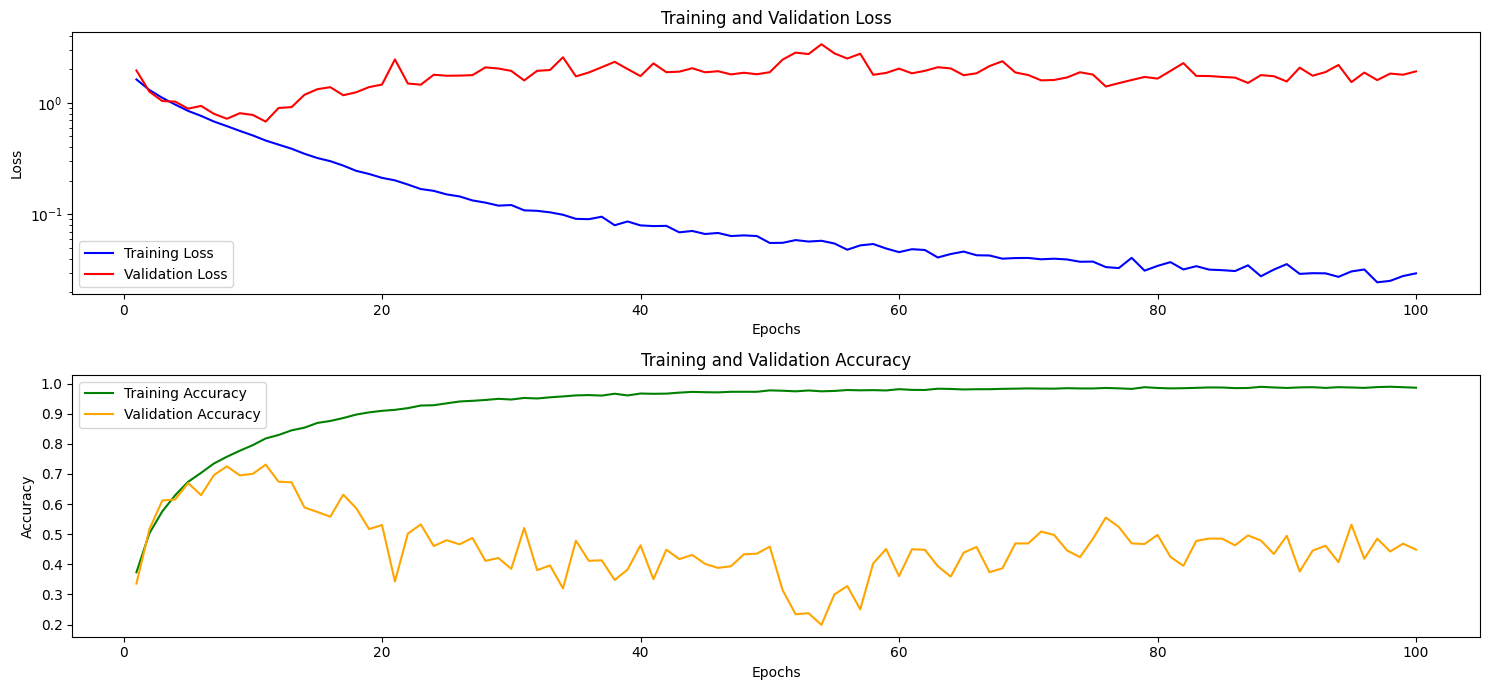

In [2]:
"""
Thanh Le  16 April 2024
How to train/fine-tune a pre-trained model on a custom dataset (i.e., transfer learning)
"""
import torch
from torch import nn, save, load
from tqdm import tqdm
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torchmetrics.functional import accuracy
from torchvision.transforms import ToTensor, Resize
import numpy as np
import os
import matplotlib.pyplot as plt

# Setup CUDA
def setup_cuda():
    # Setting seeds for reproducibility
    seed = 50
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = True
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)

    return torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


def train_model():
    """
    Train the model over a single epoch
    :return: training loss and training accuracy
    """
    train_loss = 0.0
    train_acc = 0.0
    model.train()

    for (img, label) in tqdm(train_loader, ncols=80, desc='Training'):
        # Get a batch
        img, label = img.to(device, dtype=torch.float), label.to(device, dtype=torch.long)

        # Set the gradients to zero before starting backpropagation
        optimizer.zero_grad()

        # Perform a feed-forward pass
        logits = model(img)

        # Compute the batch loss
        loss = loss_fn(logits, label)

        # Compute gradient of the loss fn w.r.t the trainable weights
        loss.backward()

        # Update the trainable weights
        optimizer.step()

        # Accumulate the batch loss
        train_loss += loss.item()

        # Get the predictions to calculate the accuracy for every iteration. Remember to accumulate the accuracy
        prediction = logits.argmax(axis=1)
        train_acc += accuracy(prediction, label, task='multiclass', average='macro', num_classes=len(class_names)).item()

    return train_loss / len(train_loader), train_acc / len(train_loader)


def validate_model():
    """
    Validate the model over a single epoch
    :return: validation loss and validation accuracy
    """
    model.eval()
    valid_loss = 0.0
    val_acc = 0.0

    with torch.no_grad():
        for (img, label) in tqdm(val_loader, ncols=80, desc='Valid'):
            # Get a batch
            img, label = img.to(device, dtype=torch.float), label.to(device, dtype=torch.long)

            # Perform a feed-forward pass
            logits = model(img)

            # Compute the batch loss
            loss = loss_fn(logits, label)

            # Accumulate the batch loss
            valid_loss += loss.item()

            # Get the predictions to calculate the accuracy for every iteration. Remember to accumulate the accuracy
            prediction = logits.argmax(axis=1)
            val_acc += accuracy(prediction, label, task='multiclass', average='macro', num_classes=len(class_names)).item()

    return valid_loss / len(val_loader), val_acc / len(val_loader)


# Example plotting function

def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    # Losses
    plt.figure(figsize=(15, 7))
    plt.subplot(2, 1, 1)
    plt.plot(epochs, train_losses, label='Training Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.yscale('log')  # Log scale can help for loss curves with large values

    # Accuracies
    plt.subplot(2, 1, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy', color='green')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    # Save the figure to a file
    plt.savefig("trainplot.png")  # You can change the file name and format (e.g., .png, .jpg, .pdf)

    plt.show()


if __name__ == "__main__":
    device = setup_cuda()

    # 1. Load the dataset
    transform = transforms.Compose([Resize((224, 224)), ToTensor()])
    train_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/train', transform=transform)
    val_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/val', transform=transform)
    # Get class names
    class_names = train_dataset.classes

    # 2. Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

    # 3. Create a new deep model without pre-trained weights
    # from utils.seresnet18 import ResNet18
    model = ResNet18(
        num_classes=len(class_names),
    ).to(device)

    # 4. Specify loss function and optimizer
    optimizer = Adam(model.parameters(), lr=1e-4)
    loss_fn = torch.nn.CrossEntropyLoss()

    # 5. Train the model with 100 epochs
    # store the metrics for plotting
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    max_acc = 0
    for epoch in range(100):

        # 5.1. Train the model over a single epoch
        train_loss, train_acc = train_model()
        train_losses.append(train_loss)     # save train loss values
        train_accuracies.append(train_acc)  # save train acc values

        # 5.2. Validate the model after training
        val_loss, val_acc = validate_model()
        val_losses.append(val_loss)         # save val loss values
        val_accuracies.append(val_acc)      # save val acc values

        print(f'Epoch {epoch}: Train loss = {train_loss}, Train accuracy: {train_acc}')
        print(f'Epoch {epoch}: Validation loss = {val_loss}, Validation accuracy: {val_acc}')

        # 4.3. Save the model if the validation accuracy is increasing
        if val_acc > max_acc:
            print(f'Validation accuracy increased ({max_acc} --> {val_acc}). Model saved')
            folder_path = 'checkpoints_resnet18'  # Define the folder name
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)  # Create the folder if it does not exist
            file_path = os.path.join(folder_path,
                                     'resnet18_epoch_' + str(epoch) + '_acc_{0:.4f}'.format(val_acc) + '.pt')
            with open(file_path, 'wb') as f:
                save(model.state_dict(), f)
            max_acc = val_acc

# After training is complete, plot the metrics
plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

# Testing for Resnet18

In [3]:
# import torch
# from torch import nn, save, load
# from tqdm import tqdm
# from torch.optim import Adam
# from torch.utils.data import DataLoader
# from torchvision.datasets import ImageFolder
# import torchvision.transforms as transforms
# from torchmetrics.functional import accuracy
# from torchvision.transforms import ToTensor, Resize
# import numpy as np
# import os
# from PIL import Image
# import matplotlib.pyplot as plt

# # Thiết lập biến cần thiết
# train_dir = '/kaggle/input/dataset-split/dataset_split/train'
# test_dir = '/kaggle/input/dataset-split/dataset_split/test'
# valid_dir = '/kaggle/input/dataset-split/dataset_split/val'
# NUM_WORKERS = os.cpu_count()
# BATCH_SIZE = 32
# IMG_SIZE = 224
# manual_transforms = transforms.Compose([
#     transforms.Resize((IMG_SIZE, IMG_SIZE)),
#     transforms.ToTensor(),
# ])
# patch_size = 16
# CLASS = {} # KHONG CAN


# # Thiết lập thiết bị (GPU hoặc CPU)
# def setup_cuda():
#     torch.backends.cudnn.enabled = True
#     torch.backends.cudnn.benchmark = True
#     device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#     return device


# device = setup_cuda()

# # Thiết lập các transform để xử lý ảnh
# manual_transforms = transforms.Compose([
#     transforms.Resize((IMG_SIZE, IMG_SIZE)),
#     transforms.ToTensor(),
# ])


# # Hàm dự đoán kết quả cho một hình ảnh
# def predict_image(image_path, model, transform, class_names, device):
#     model.eval()
#     img = Image.open(image_path).convert('RGB')
#     img_tensor = transform(img).unsqueeze(0).to(device)
#     with torch.no_grad():
#         output = model(img_tensor)
#         _, predicted_class = torch.max(output, 1)
#     predicted_label = class_names[predicted_class.item()]
#     return img, predicted_label


# # Hàm chính để dự đoán các hình ảnh trong tập test
# def test_model():
#     # 1. Tải dữ liệu và lớp từ tập train
#     transform = transforms.Compose([Resize((224, 224)), ToTensor()])
#     train_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/train', transform=transform)
#     test_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/test', transform=transform)
#     # Get class names
#     class_names = train_dataset.classes

#     # 2. Tạo mô hình ViT và tải trạng thái từ checkpoint
#     from utils.resnet18 import ResNet18

#     model = ResNet18(
#         num_classes=len(class_names),
#     ).to(device)

#     folder_checkpoint = 'checkpoints_resnet18'  # Define the folder name
#     file_name = 'resnet18_epoch_92_acc_0.9652.pt' #best weight
#     file_checkpoint = os.path.join(folder_checkpoint, file_name)  # lay best weight
#     model.load_state_dict(torch.load(file_checkpoint, device))
#     print('Model loaded from checkpoint.')
#     # Ensure the output directory exists
#     output_dir = "output_resnet18"
#     os.makedirs(output_dir, exist_ok=True)

#     # 3. Dự đoán kết quả cho mỗi hình ảnh trong tập test
#     for image_path in tqdm(test_dataset.imgs, desc='Testing'):
#         img, predicted_label = predict_image(image_path[0], model, manual_transforms, class_names, device)
#         # plt.imshow(img)
#         # plt.title(f'Predicted: {predicted_label}')
#         # plt.show()

#         # Convert the tensor image back to a PIL image if necessary
#         if isinstance(img, torch.Tensor):
#             img = transforms.ToPILImage()(img)

#         # Create a plot
#         fig, ax = plt.subplots()

#         # Set white background
#         fig.patch.set_facecolor('white')
#         ax.set_facecolor('white')

#         # Remove axis
#         ax.axis('off')

#         # Display the image
#         ax.imshow(img)

#         # Add the predicted label as the title
#         ax.set_title(f'Predicted: {predicted_label}', fontsize=12, pad=10)

#         # Save the figure
#         image_basename = os.path.basename(image_path[0])
#         image_name, image_ext = os.path.splitext(image_basename)
#         output_image_path = os.path.join(output_dir, f"{image_name}_pred_{predicted_label}.png")

#         plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0.1)
#         plt.close(fig)


# if __name__ == '__main__':
#     test_model()


# SEBLOCK

In [4]:
# import torch.nn as nn

# class SE_Block(nn.Module):
#     def __init__(self, c, r=16):
#         super(SE_Block, self).__init__()
#         self.squeeze = nn.AdaptiveAvgPool2d(1)
#         self.excitation = nn.Sequential(
#             nn.Linear(c, c // r, bias=False),
#             nn.ReLU(inplace=True),
#             nn.Linear(c // r, c, bias=False),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         bs, c, _, _ = x.size()
#         y = self.squeeze(x).view(bs, c)
#         y = self.excitation(y).view(bs, c, 1, 1)
#         return x * y.expand_as(x)

# SEBLOCK + Resnet18

In [5]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F


# class SEBlock(nn.Module):
#     def __init__(self, input_channels, reduction_ratio=16):
#         super(SEBlock, self).__init__()
#         self.avg_pool = nn.AdaptiveAvgPool2d(1)
#         self.fc1 = nn.Linear(input_channels, input_channels // reduction_ratio, bias=False)
#         self.relu = nn.ReLU(inplace=True)
#         self.fc2 = nn.Linear(input_channels // reduction_ratio, input_channels, bias=False)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         batch_size, channels, _, _ = x.size()
#         y = self.avg_pool(x).view(batch_size, channels)
#         y = self.fc1(y)
#         y = self.relu(y)
#         y = self.fc2(y)
#         y = self.sigmoid(y).view(batch_size, channels, 1, 1)
#         return x * y.expand_as(x)


# class SEResNet18(nn.Module):
#     def __init__(self, num_classes):
#         super(SEResNet18, self).__init__()

#         self.dropout_percentage = 0.5
#         self.relu = nn.ReLU()

#         # BLOCK-1 (starting block) input=(224x224) output=(56x56)
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
#         self.batchnorm1 = nn.BatchNorm2d(64)
#         self.maxpool1 = nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

#         # BLOCK-2 (1) input=(56x56) output = (56x56)
#         self.conv2_1_1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm2_1_1 = nn.BatchNorm2d(64)
#         self.conv2_1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm2_1_2 = nn.BatchNorm2d(64)
#         self.dropout2_1 = nn.Dropout(p=self.dropout_percentage)
#         self.se2_1 = SEBlock(64)

#         # BLOCK-2 (2)
#         self.conv2_2_1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm2_2_1 = nn.BatchNorm2d(64)
#         self.conv2_2_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm2_2_2 = nn.BatchNorm2d(64)
#         self.dropout2_2 = nn.Dropout(p=self.dropout_percentage)
#         self.se2_2 = SEBlock(64)

#         # BLOCK-3 (1) input=(56x56) output = (28x28)
#         self.conv3_1_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
#         self.batchnorm3_1_1 = nn.BatchNorm2d(128)
#         self.conv3_1_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm3_1_2 = nn.BatchNorm2d(128)
#         self.concat_adjust_3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(1, 1), stride=(2, 2),
#                                          padding=(0, 0))
#         self.dropout3_1 = nn.Dropout(p=self.dropout_percentage)
#         self.se3_1 = SEBlock(128)

#         # BLOCK-3 (2)
#         self.conv3_2_1 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm3_2_1 = nn.BatchNorm2d(128)
#         self.conv3_2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm3_2_2 = nn.BatchNorm2d(128)
#         self.dropout3_2 = nn.Dropout(p=self.dropout_percentage)
#         self.se3_2 = SEBlock(128)

#         # BLOCK-4 (1) input=(28x28) output = (14x14)
#         self.conv4_1_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
#         self.batchnorm4_1_1 = nn.BatchNorm2d(256)
#         self.conv4_1_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm4_1_2 = nn.BatchNorm2d(256)
#         self.concat_adjust_4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(1, 1), stride=(2, 2),
#                                          padding=(0, 0))
#         self.dropout4_1 = nn.Dropout(p=self.dropout_percentage)
#         self.se4_1 = SEBlock(256)

#         # BLOCK-4 (2)
#         self.conv4_2_1 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm4_2_1 = nn.BatchNorm2d(256)
#         self.conv4_2_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm4_2_2 = nn.BatchNorm2d(256)
#         self.dropout4_2 = nn.Dropout(p=self.dropout_percentage)
#         self.se4_2 = SEBlock(256)

#         # BLOCK-5 (1) input=(14x14) output = (7x7)
#         self.conv5_1_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
#         self.batchnorm5_1_1 = nn.BatchNorm2d(512)
#         self.conv5_1_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm5_1_2 = nn.BatchNorm2d(512)
#         self.concat_adjust_5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(1, 1), stride=(2, 2),
#                                          padding=(0, 0))
#         self.dropout5_1 = nn.Dropout(p=self.dropout_percentage)
#         self.se5_1 = SEBlock(512)

#         # BLOCK-5 (2)
#         self.conv5_2_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm5_2_1 = nn.BatchNorm2d(512)
#         self.conv5_2_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm5_2_2 = nn.BatchNorm2d(512)
#         self.dropout5_2 = nn.Dropout(p=self.dropout_percentage)
#         self.se5_2 = SEBlock(512)

#         # Final Block input=(7x7)
#         self.avgpool = nn.AvgPool2d(kernel_size=(7, 7), stride=(1, 1))
#         self.fc = nn.Linear(in_features=1 * 1 * 512, out_features=1000)
#         self.out = nn.Linear(in_features=1000, out_features=num_classes)
#         # END

#     def forward(self, x):
#         # block 1 --> Starting block
#         x = self.relu(self.batchnorm1(self.conv1(x)))
#         op1 = self.maxpool1(x)

#         # block2 - 1
#         x = self.relu(self.batchnorm2_1_1(self.conv2_1_1(op1)))  # conv2_1
#         x = self.batchnorm2_1_2(self.conv2_1_2(x))  # conv2_1
#         x = self.dropout2_1(x)
#         x = self.se2_1(x)
#         # block2 - Adjust - No adjust in this layer as dimensions are already same
#         # block2 - Concatenate 1
#         op2_1 = self.relu(x + op1)
#         # block2 - 2
#         x = self.relu(self.batchnorm2_2_1(self.conv2_2_1(op2_1)))  # conv2_2
#         x = self.batchnorm2_2_2(self.conv2_2_2(x))  # conv2_2
#         x = self.dropout2_2(x)
#         x = self.se2_2(x)
#         # op - block2
#         op2 = self.relu(x + op2_1)

#         # block3 - 1[Convolution block]
#         x = self.relu(self.batchnorm3_1_1(self.conv3_1_1(op2)))  # conv3_1
#         x = self.batchnorm3_1_2(self.conv3_1_2(x))  # conv3_1
#         x = self.dropout3_1(x)
#         x = self.se3_1(x)
#         # block3 - Adjust
#         op2 = self.concat_adjust_3(op2)  # SKIP CONNECTION
#         # block3 - Concatenate 1
#         op3_1 = self.relu(x + op2)
#         # block3 - 2[Identity Block]
#         x = self.relu(self.batchnorm3_2_1(self.conv3_2_1(op3_1)))  # conv3_2
#         x = self.batchnorm3_2_2(self.conv3_2_2(x))  # conv3_2
#         x = self.dropout3_2(x)
#         x = self.se3_2(x)
#         # op - block3
#         op3 = self.relu(x + op3_1)

#         # block4 - 1[Convolition block]
#         x = self.relu(self.batchnorm4_1_1(self.conv4_1_1(op3)))  # conv4_1
#         x = self.batchnorm4_1_2(self.conv4_1_2(x))  # conv4_1
#         x = self.dropout4_1(x)
#         x = self.se4_1(x)
#         # block4 - Adjust
#         op3 = self.concat_adjust_4(op3)  # SKIP CONNECTION
#         # block4 - Concatenate 1
#         op4_1 = self.relu(x + op3)
#         # block4 - 2[Identity Block]
#         x = self.relu(self.batchnorm4_2_1(self.conv4_2_1(op4_1)))  # conv4_2
#         x = self.batchnorm4_2_2(self.conv4_2_2(x))  # conv4_2
#         x = self.dropout4_2(x)
#         x = self.se4_2(x)
#         # op - block4
#         op4 = self.relu(x + op4_1)

#         # block5 - 1[Convolution Block]
#         x = self.relu(self.batchnorm5_1_1(self.conv5_1_1(op4)))  # conv5_1
#         x = self.batchnorm5_1_2(self.conv5_1_2(x))  # conv5_1
#         x = self.dropout5_1(x)
#         x = self.se5_1(x)
#         # block5 - Adjust
#         op4 = self.concat_adjust_5(op4)  # SKIP CONNECTION
#         # block5 - Concatenate 1
#         op5_1 = self.relu(x + op4)
#         # block5 - 2[Identity Block]
#         x = self.relu(self.batchnorm5_2_1(self.conv5_2_1(op5_1)))  # conv5_2
#         x = self.batchnorm5_2_2(self.conv5_2_1(x))  # conv5_2
#         x = self.dropout5_2(x)
#         x = self.se5_2(x)
#         # op - block5
#         op5 = self.relu(x + op5_1)

#         # FINAL BLOCK - classifier
#         x = self.avgpool(op5)
#         x = x.reshape(x.shape[0], -1)
#         x = self.relu(self.fc(x))
#         x = self.out(x)

#         return x


# Train SEBLock

In [6]:
# """
# Thanh Le  16 April 2024
# How to train/fine-tune a pre-trained model on a custom dataset (i.e., transfer learning)
# """
# import torch
# from torch import nn, save, load
# from tqdm import tqdm
# from torch.optim import Adam
# from torch.utils.data import DataLoader
# from torchvision.datasets import ImageFolder
# import torchvision.transforms as transforms
# from torchmetrics.functional import accuracy
# from torchvision.transforms import ToTensor, Resize
# import numpy as np
# import os
# import matplotlib.pyplot as plt

# # Setup CUDA
# def setup_cuda():
#     # Setting seeds for reproducibility
#     seed = 50
#     torch.backends.cudnn.enabled = True
#     torch.backends.cudnn.benchmark = True
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     if torch.cuda.is_available():
#         torch.cuda.manual_seed(seed)

#     return torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


# def train_model():
#     """
#     Train the model over a single epoch
#     :return: training loss and training accuracy
#     """
#     train_loss = 0.0
#     train_acc = 0.0
#     model.train()

#     for (img, label) in tqdm(train_loader, ncols=80, desc='Training'):
#         # Get a batch
#         img, label = img.to(device, dtype=torch.float), label.to(device, dtype=torch.long)

#         # Set the gradients to zero before starting backpropagation
#         optimizer.zero_grad()

#         # Perform a feed-forward pass
#         logits = model(img)

#         # Compute the batch loss
#         loss = loss_fn(logits, label)

#         # Compute gradient of the loss fn w.r.t the trainable weights
#         loss.backward()

#         # Update the trainable weights
#         optimizer.step()

#         # Accumulate the batch loss
#         train_loss += loss.item()

#         # Get the predictions to calculate the accuracy for every iteration. Remember to accumulate the accuracy
#         prediction = logits.argmax(axis=1)
#         train_acc += accuracy(prediction, label, task='multiclass', average='macro', num_classes=len(class_names)).item()

#     return train_loss / len(train_loader), train_acc / len(train_loader)


# def validate_model():
#     """
#     Validate the model over a single epoch
#     :return: validation loss and validation accuracy
#     """
#     model.eval()
#     valid_loss = 0.0
#     val_acc = 0.0

#     with torch.no_grad():
#         for (img, label) in tqdm(val_loader, ncols=80, desc='Valid'):
#             # Get a batch
#             img, label = img.to(device, dtype=torch.float), label.to(device, dtype=torch.long)

#             # Perform a feed-forward pass
#             logits = model(img)

#             # Compute the batch loss
#             loss = loss_fn(logits, label)

#             # Accumulate the batch loss
#             valid_loss += loss.item()

#             # Get the predictions to calculate the accuracy for every iteration. Remember to accumulate the accuracy
#             prediction = logits.argmax(axis=1)
#             val_acc += accuracy(prediction, label, task='multiclass', average='macro', num_classes=len(class_names)).item()

#     return valid_loss / len(val_loader), val_acc / len(val_loader)

# # Example plotting function

# def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
#     epochs = range(1, len(train_losses) + 1)
#     # Losses
#     plt.figure(figsize=(15, 7))
#     plt.subplot(2, 1, 1)
#     plt.plot(epochs, train_losses, label='Training Loss', color='blue')
#     plt.plot(epochs, val_losses, label='Validation Loss', color='red')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.title('Training and Validation Loss')
#     plt.legend()
#     plt.yscale('log')  # Log scale can help for loss curves with large values

#     # Accuracies
#     plt.subplot(2, 1, 2)
#     plt.plot(epochs, train_accuracies, label='Training Accuracy', color='green')
#     plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='orange')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.title('Training and Validation Accuracy')
#     plt.legend()

#     plt.tight_layout()
#     # Save the figure to a file
#     plt.savefig("trainplot.png")  # You can change the file name and format (e.g., .png, .jpg, .pdf)

#     plt.show()

# if __name__ == "__main__":
#     device = setup_cuda()

#     # 1. Load the dataset
#     transform = transforms.Compose([Resize((224, 224)), ToTensor()])
#     train_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/train', transform=transform)
#     val_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/val', transform=transform)
#     # Get class names
#     class_names = train_dataset.classes

#     # 2. Create data loaders
#     train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#     val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

#     # 3. Create a new deep model without pre-trained weights
#     # from utils.seresnet18 import SEResNet18

#     model = SEResNet18(
#         num_classes=len(class_names),
#     ).to(device)

#     # 4. Specify loss function and optimizer
#     optimizer = Adam(model.parameters(), lr=1e-4)
#     loss_fn = torch.nn.CrossEntropyLoss()

#     # 5. Train the model with 100 epochs
#     # store the metrics for plotting
#     train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

#     max_acc = 0
#     for epoch in range(100):

#         # 5.1. Train the model over a single epoch
#         train_loss, train_acc = train_model()
#         train_losses.append(train_loss)  # save train loss values
#         train_accuracies.append(train_acc)  # save train acc values

#         # 5.2. Validate the model after training
#         val_loss, val_acc = validate_model()
#         val_losses.append(val_loss)  # save val loss values
#         val_accuracies.append(val_acc)  # save val acc values

#         print(f'Epoch {epoch}: Train loss = {train_loss}, Train accuracy: {train_acc}')
#         print(f'Epoch {epoch}: Validation loss = {val_loss}, Validation accuracy: {val_acc}')

#         # 4.3. Save the model if the validation accuracy is increasing
#         if val_acc > max_acc:
#             print(f'Validation accuracy increased ({max_acc} --> {val_acc}). Model saved')
#             folder_path = 'checkpoints_se_resnet18'  # Define the folder name
#             if not os.path.exists(folder_path):
#                 os.makedirs(folder_path)  # Create the folder if it does not exist
#             file_path = os.path.join(folder_path,
#                                      'se_resnet18_epoch_' + str(epoch) + '_acc_{0:.4f}'.format(val_acc) + '.pt')
#             with open(file_path, 'wb') as f:
#                 save(model.state_dict(), f)
#             max_acc = val_acc
# # After training is complete, plot the metrics
# plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

# Testing SEResnet18

In [7]:
# import torch
# from torch import nn, save, load
# from tqdm import tqdm
# from torch.optim import Adam
# from torch.utils.data import DataLoader
# from torchvision.datasets import ImageFolder
# import torchvision.transforms as transforms
# from torchmetrics.functional import accuracy
# from torchvision.transforms import ToTensor, Resize
# import numpy as np
# import os
# from PIL import Image
# import matplotlib.pyplot as plt

# # Thiết lập biến cần thiết
# train_dir = '/kaggle/input/playcards/train'
# test_dir = '/kaggle/input/playcards/test'
# valid_dir = '/kaggle/input/playcards/valid'
# NUM_WORKERS = os.cpu_count()
# BATCH_SIZE = 32
# IMG_SIZE = 224
# manual_transforms = transforms.Compose([
#     transforms.Resize((IMG_SIZE, IMG_SIZE)),
#     transforms.ToTensor(),
# ])
# patch_size = 16
# CLASS = {} # KHONG CAN DIEN CHI TIET


# # Thiết lập thiết bị (GPU hoặc CPU)
# def setup_cuda():
#     torch.backends.cudnn.enabled = True
#     torch.backends.cudnn.benchmark = True
#     device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#     return device


# device = setup_cuda()

# # Thiết lập các transform để xử lý ảnh
# manual_transforms = transforms.Compose([
#     transforms.Resize((IMG_SIZE, IMG_SIZE)),
#     transforms.ToTensor(),
# ])


# # Hàm dự đoán kết quả cho một hình ảnh
# def predict_image(image_path, model, transform, class_names, device):
#     model.eval()
#     img = Image.open(image_path).convert('RGB')
#     img_tensor = transform(img).unsqueeze(0).to(device)
#     with torch.no_grad():
#         output = model(img_tensor)
#         _, predicted_class = torch.max(output, 1)
#     predicted_label = class_names[predicted_class.item()]
#     return img, predicted_label


# # Hàm chính để dự đoán các hình ảnh trong tập test
# def test_model():
#     # 1. Tải dữ liệu và lớp từ tập train
#     transform = transforms.Compose([Resize((224, 224)), ToTensor()])
#     train_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/train', transform=transform)
#     test_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/test', transform=transform)
#     # Get class names
#     class_names = train_dataset.classes

#     # 2. Tạo mô hình ViT và tải trạng thái từ checkpoint
#     from utils.resnet18 import ResNet18

#     model = ResNet18(
#         num_classes=len(class_names),
#     ).to(device)

#     folder_checkpoint = 'checkpoints_se_resnet18'  # Define the folder name
#     file_name = 'se_resnet18_epoch_7_acc_0.8208.pt' #best weight
#     file_checkpoint = os.path.join(folder_checkpoint, file_name)  # lay best weight
#     model.load_state_dict(torch.load(file_checkpoint, device))
#     print('Model loaded from checkpoint.')
#     # Ensure the output directory exists
#     output_dir = "output_resnet18"
#     os.makedirs(output_dir, exist_ok=True)

#     # 3. Dự đoán kết quả cho mỗi hình ảnh trong tập test
#     for image_path in tqdm(test_dataset.imgs, desc='Testing'):
#         img, predicted_label = predict_image(image_path[0], model, manual_transforms, class_names, device)
#         # plt.imshow(img)
#         # plt.title(f'Predicted: {predicted_label}')
#         # plt.show()

#         # Convert the tensor image back to a PIL image if necessary
#         if isinstance(img, torch.Tensor):
#             img = transforms.ToPILImage()(img)

#         # Create a plot
#         fig, ax = plt.subplots()

#         # Set white background
#         fig.patch.set_facecolor('white')
#         ax.set_facecolor('white')

#         # Remove axis
#         ax.axis('off')

#         # Display the image
#         ax.imshow(img)

#         # Add the predicted label as the title
#         ax.set_title(f'Predicted: {predicted_label}', fontsize=12, pad=10)

#         # Save the figure
#         image_basename = os.path.basename(image_path[0])
#         image_name, image_ext = os.path.splitext(image_basename)
#         output_image_path = os.path.join(output_dir, f"{image_name}_pred_{predicted_label}.png")

#         plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0.1)
#         plt.close(fig)


# if __name__ == '__main__':
#     test_model()
